In [1]:
import pathlib
import pandas
from matplotlib import pyplot

In [2]:
path = pathlib.Path('media').absolute()

In [3]:
white_women = list(path.joinpath('white').glob('**/*'))
black_women = list(path.joinpath('black').glob('**/*'))

In [4]:
def assemble(files, skin_color):
    for file in files:
        yield {
            'name': file.stem,
            'filename': file.name,
            'path': file,
            'skin_color': skin_color
        }

white_women_objs = list(assemble(white_women, 'White'))
black_women_objs = list(assemble(black_women, 'Black'))

In [5]:
ASSEMBLED_FACES = white_women_objs + black_women_objs

In [6]:
df1 = pandas.DataFrame(white_women_objs, columns=['name', 'skin_color'])
df2 = pandas.DataFrame(black_women_objs, columns=['name', 'skin_color'])

In [7]:
df = pandas.concat([df1, df2])

In [8]:
df.head(3)

,name,skin_color
0,fw1,White
1,fw10,White
2,fw100,White


In [9]:
group = df.groupby('skin_color')['name'].count()

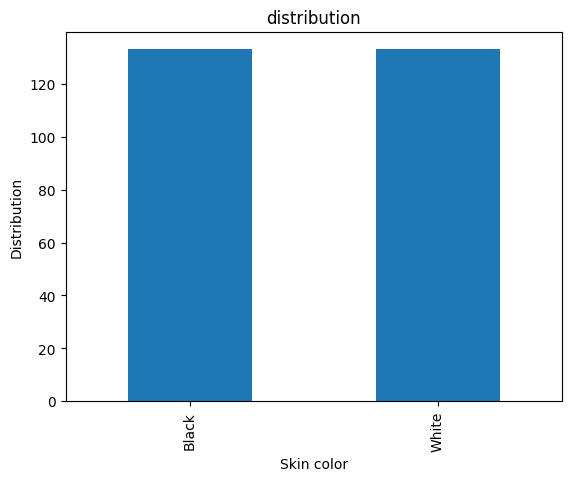

In [10]:
group.plot(kind='bar')
pyplot.title('distribution')
pyplot.ylabel('Distribution')
pyplot.xlabel('Skin color')
pyplot.show()

In [11]:
import os
import django
from django.conf import settings

In [12]:
BASE_DIR = pathlib.Path('.')


In [13]:
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': 'my_faces.sqlite3'
    }
}

# {
#     'default': {
#         'ENGINE': 'django.db.backends.postgresql',
#         'NAME': 'my_faces',
#         'USER': 'test_user',
#         'PASSWORD': 'touparet',
#         'HOST': 'localhost',
#         'PORT': '5432',
#     }
# }

In [14]:
settings.configure(
    BASE_DIR=BASE_DIR,
    INSTALLED_APPS=[
        'django.contrib.admin',
        'django.contrib.auth',
        'django.contrib.contenttypes',
        'django.contrib.sessions',
        'django.contrib.messages',
        'django.contrib.staticfiles',

        'scores'
    ],
    DATABASES=DATABASES,
    MEDIA_URL='/media/',
    MEDIA_ROOT=BASE_DIR.joinpath('media'),
    CACHES={
        'default': {
            'BACKEND': 'django.core.cache.backends.filebased.FileBasedCache',
            'LOCATION': BASE_DIR.joinpath('cache'),
        }
    }
)

In [15]:
os.environ.setdefault('DJANGO_ALLOW_ASYNC_UNSAFE', 'True')

'True'

In [16]:
django.setup()

## Populate database

In [17]:
from django.core.files import File
from scores.models import Face

In [18]:
            
def popoulate_database(commit=False):
    def prepare_images():
        for item in ASSEMBLED_FACES:
            obj = File(open(item['path'], mode='rb'), name=item['filename'])
            yield Face(image=obj, skin_color=item['skin_color'])
                
    if commit:        
        return Face.objects.bulk_create(prepare_images())
    return prepare_images()

popoulate_database(commit=True)

[<Face: Face: 1331>,
 <Face: Face: 1332>,
 <Face: Face: 1333>,
 <Face: Face: 1334>,
 <Face: Face: 1335>,
 <Face: Face: 1336>,
 <Face: Face: 1337>,
 <Face: Face: 1338>,
 <Face: Face: 1339>,
 <Face: Face: 1340>,
 <Face: Face: 1341>,
 <Face: Face: 1342>,
 <Face: Face: 1343>,
 <Face: Face: 1344>,
 <Face: Face: 1345>,
 <Face: Face: 1346>,
 <Face: Face: 1347>,
 <Face: Face: 1348>,
 <Face: Face: 1349>,
 <Face: Face: 1350>,
 <Face: Face: 1351>,
 <Face: Face: 1352>,
 <Face: Face: 1353>,
 <Face: Face: 1354>,
 <Face: Face: 1355>,
 <Face: Face: 1356>,
 <Face: Face: 1357>,
 <Face: Face: 1358>,
 <Face: Face: 1359>,
 <Face: Face: 1360>,
 <Face: Face: 1361>,
 <Face: Face: 1362>,
 <Face: Face: 1363>,
 <Face: Face: 1364>,
 <Face: Face: 1365>,
 <Face: Face: 1366>,
 <Face: Face: 1367>,
 <Face: Face: 1368>,
 <Face: Face: 1369>,
 <Face: Face: 1370>,
 <Face: Face: 1371>,
 <Face: Face: 1372>,
 <Face: Face: 1373>,
 <Face: Face: 1374>,
 <Face: Face: 1375>,
 <Face: Face: 1376>,
 <Face: Face: 1377>,
 <Face: Face:

## Create CSV File

In [19]:
import pandas

def to_dataframe(data):
    return pandas.DataFrame(data=data, columns=['path', 'skin_color'])

p1 = to_dataframe(f1)
p2 = to_dataframe(f2)

NameError: name 'f1' is not defined

In [ ]:
df = pandas.concat([p1, p2])

In [ ]:
df.to_csv('faces.csv', index=False)